In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("USA_Housing.csv")

## Check out the data

In [5]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

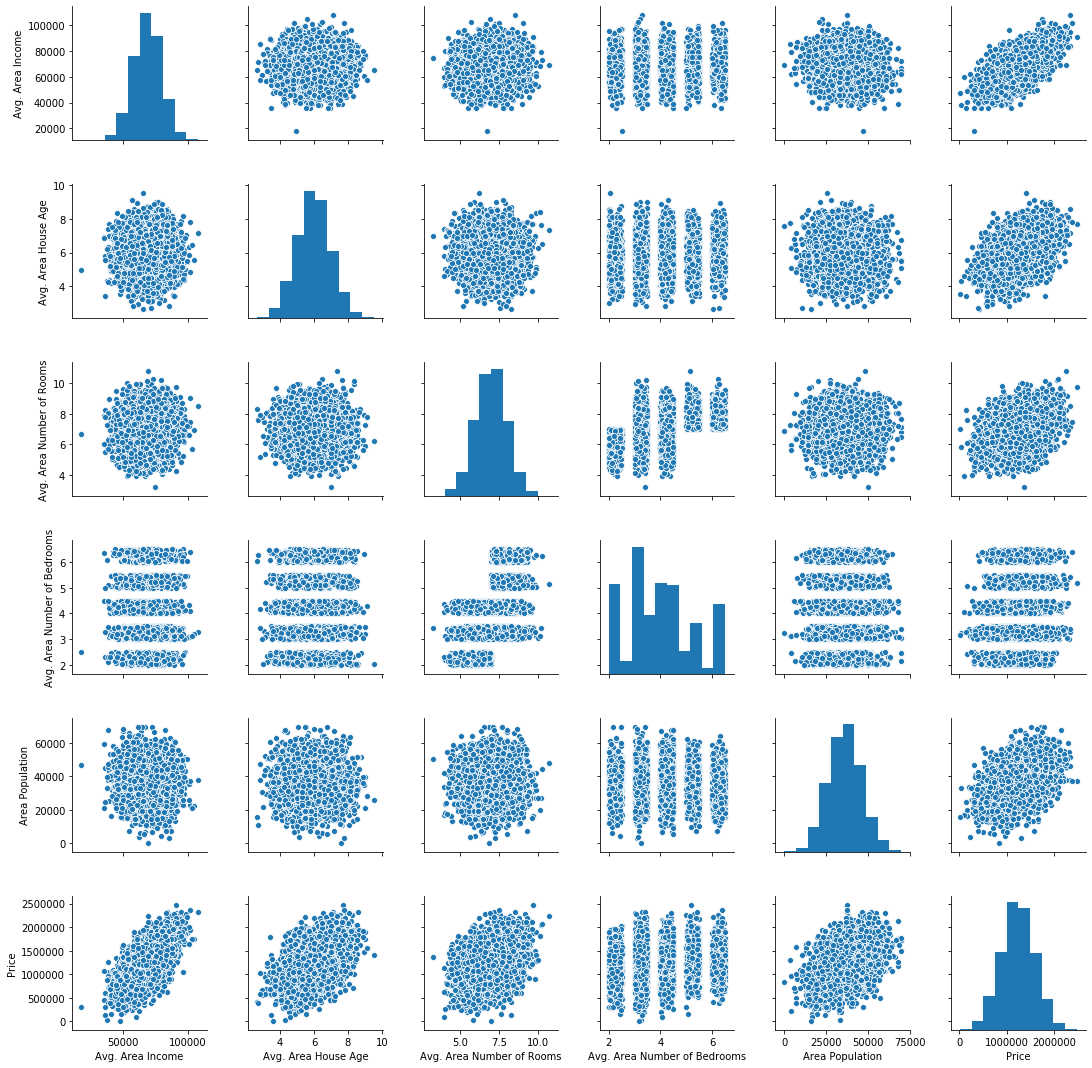

In [8]:
sns.pairplot(df)

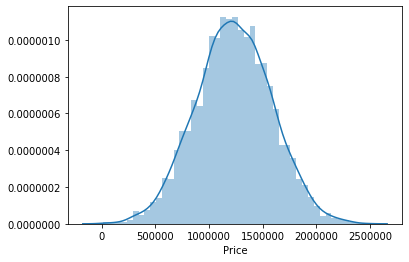

In [9]:
sns.distplot(df["Price"])

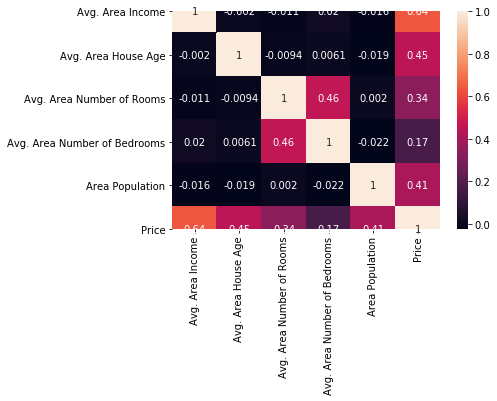

In [11]:
sns.heatmap(df.corr(), annot=True)

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [42]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [43]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
5       1.068138e+06
6       1.502056e+06
7       1.573937e+06
8       7.988695e+05
9       1.545155e+06
10      1.707046e+06
11      6.637324e+05
12      1.042814e+06
13      1.291332e+06
14      1.402818e+06
15      1.306675e+06
16      1.556787e+06
17      5.284852e+05
18      1.019426e+06
19      1.030591e+06
20      2.146925e+06
21      9.292476e+05
22      7.188872e+05
23      7.439998e+05
24      8.957371e+05
25      1.453975e+06
26      1.125693e+06
27      9.754295e+05
28      1.240764e+06
29      1.577018e+06
            ...     
4970    1.120943e+06
4971    1.111307e+06
4972    1.736402e+06
4973    1.340770e+06
4974    8.013486e+05
4975    1.324382e+06
4976    1.340344e+06
4977    1.518478e+06
4978    1.910585e+06
4979    1.823498e+06
4980    1.406865e+06
4981    1.203850e+06
4982    1.020096e+06
4983    1.194357e+06
4984    1.211900e+06
4985    1.378938e+06
4986    1.260

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
cdf

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [57]:
predictions = lm.predict(X_test)

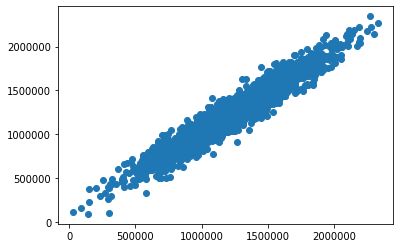

In [61]:
plt.scatter(y_test, predictions)

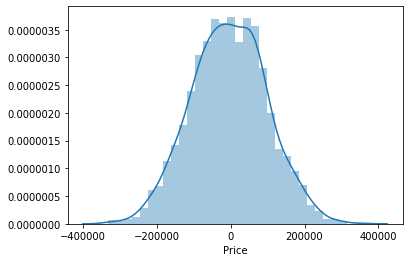

In [62]:
sns.distplot((y_test - predictions))

In [63]:
from sklearn import metrics

In [64]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914928

In [65]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208244

In [66]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290538